Nessa semana, o estudo é sobre como transformar as palavras em números a fim de se identificar cada uma delas dentro de uma lista.
Esse processo se chama tokenização.

# 0.0 - Imports

In [2]:
import json
import re
import tensorflow        as tf
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text     import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


## 0.1 Load Data

In [3]:
datastore = [json.loads(line) for line in open(r"D:\Cursos_DS\NLP_coursera\Data\archive\Sarcasm_Headlines_Dataset_v2.json", 'r')]

# 1.0 Data Preparation

## 1.1 Configuration

In [4]:
vocab_size = 10000 # Quantidade de palavras
embedding_dim = 16
max_length = 1000 # Tamanho de cada frase
trunc_type = 'post'
padding_type = 'post'
oov_tok = 'XXXX'
training_size = 20000

## 1.2 Sentences and labels

In [5]:
sentences = [] 
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

# 2.0 Preprocessing

## 2.1 Train and test

In [6]:
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]
testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [7]:
testing_labels_final = np.array(testing_labels)
training_labels_final = np.array(training_labels)

## 2.2 Tokenização

In [8]:
tokenizer = Tokenizer(  num_words = vocab_size,
                        oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences) # Tokenizando as palavras do treinamento

word_index = tokenizer.word_index

# Criando a sequência de palavras para o treinamento, Substituindo as palavras pelos seus tokens.
training_sequences = tokenizer.texts_to_sequences(training_sentences) 
training_padded = pad_sequences(training_sequences,
                                maxlen= max_length,
                                padding=padding_type,
                                truncating= trunc_type)

# Repetindo o processo para os dados de teste.
testing_sequences = tokenizer.texts_to_sequences(testing_sentences) 
testing_padded = pad_sequences(testing_sequences,
                                maxlen= max_length,
                                padding=padding_type,
                                truncating= trunc_type)


# 3.0 Model

## 3.1 Build Model - Model_1

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length), # Aqui é onde a magia realmente acontece
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

In [9]:
# Compile
loss = 'binary_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']

In [10]:
model.compile(  loss= loss,
                optimizer = optimizer,
                metrics = metrics)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 16)          160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 160,109
Trainable params: 160,109
Non-trainable params: 0
_________________________________________________________________


### 3.1.2 Model Fit

In [12]:
n_epochs = 15


In [13]:
history = model.fit(training_padded,
                    training_labels_final,
                    epochs = n_epochs,
                    validation_data = (testing_padded, testing_labels_final),
                    verbose = 2)

Epoch 1/15
625/625 - 6s - loss: 0.6918 - accuracy: 0.5231 - val_loss: 0.6913 - val_accuracy: 0.5249 - 6s/epoch - 9ms/step
Epoch 2/15
625/625 - 5s - loss: 0.6909 - accuracy: 0.5231 - val_loss: 0.6897 - val_accuracy: 0.5249 - 5s/epoch - 7ms/step
Epoch 3/15
625/625 - 5s - loss: 0.6879 - accuracy: 0.5329 - val_loss: 0.6856 - val_accuracy: 0.5249 - 5s/epoch - 7ms/step
Epoch 4/15
625/625 - 5s - loss: 0.6783 - accuracy: 0.5527 - val_loss: 0.6689 - val_accuracy: 0.5279 - 5s/epoch - 7ms/step
Epoch 5/15
625/625 - 5s - loss: 0.6311 - accuracy: 0.7050 - val_loss: 0.5869 - val_accuracy: 0.7423 - 5s/epoch - 7ms/step
Epoch 6/15
625/625 - 5s - loss: 0.5328 - accuracy: 0.7986 - val_loss: 0.5003 - val_accuracy: 0.7837 - 5s/epoch - 7ms/step
Epoch 7/15
625/625 - 5s - loss: 0.4529 - accuracy: 0.8266 - val_loss: 0.4413 - val_accuracy: 0.8212 - 5s/epoch - 7ms/step
Epoch 8/15
625/625 - 5s - loss: 0.4041 - accuracy: 0.8396 - val_loss: 0.4657 - val_accuracy: 0.7617 - 5s/epoch - 8ms/step
Epoch 9/15
625/625 - 5s 

### 3.1.3 Results

In [14]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

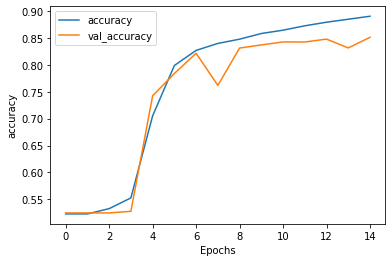

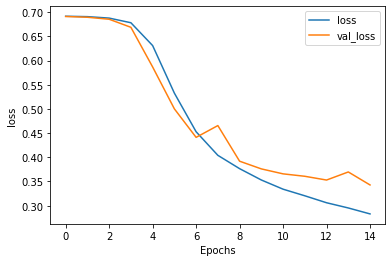

In [16]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## 3.2 Build Model - Model_2

In [10]:
# Aumentando o número de dimensões para embedding ... 
embedding_dim = 64

In [12]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length), # Aqui é onde a magia realmente acontece
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])
# Compile
loss = 'binary_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']
model_2.compile(  loss= loss,
                optimizer = optimizer,
                metrics = metrics)
model_2.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 64)          640000    
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 640,397
Trainable params: 640,397
Non-trainable params: 0
_________________________________________________________________


### 3.2.2 Model Fit


In [17]:
n_epochs = 30

history_2 = model_2.fit(training_padded,
                    training_labels_final,
                    epochs = n_epochs,
                    validation_data = (testing_padded, testing_labels_final),
                    verbose = 2)


Epoch 1/30
625/625 - 18s - loss: 0.2352 - accuracy: 0.9069 - val_loss: 0.3427 - val_accuracy: 0.8482 - 18s/epoch - 29ms/step
Epoch 2/30
625/625 - 17s - loss: 0.2252 - accuracy: 0.9133 - val_loss: 0.3349 - val_accuracy: 0.8522 - 17s/epoch - 28ms/step
Epoch 3/30
625/625 - 17s - loss: 0.2157 - accuracy: 0.9165 - val_loss: 0.3459 - val_accuracy: 0.8507 - 17s/epoch - 27ms/step
Epoch 4/30
625/625 - 17s - loss: 0.2091 - accuracy: 0.9191 - val_loss: 0.3384 - val_accuracy: 0.8510 - 17s/epoch - 27ms/step
Epoch 5/30
625/625 - 18s - loss: 0.2046 - accuracy: 0.9210 - val_loss: 0.3371 - val_accuracy: 0.8561 - 18s/epoch - 28ms/step
Epoch 6/30
625/625 - 19s - loss: 0.1927 - accuracy: 0.9252 - val_loss: 0.3524 - val_accuracy: 0.8498 - 19s/epoch - 31ms/step
Epoch 7/30
625/625 - 18s - loss: 0.1861 - accuracy: 0.9302 - val_loss: 0.3664 - val_accuracy: 0.8426 - 18s/epoch - 29ms/step
Epoch 8/30
625/625 - 21s - loss: 0.1787 - accuracy: 0.9310 - val_loss: 0.3692 - val_accuracy: 0.8421 - 21s/epoch - 34ms/step


### 3.2.3 Results


In [18]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

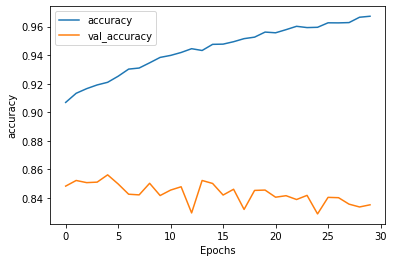

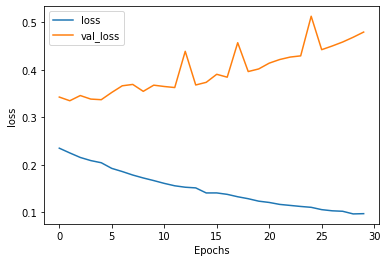

In [20]:
plot_graphs(history_2, 'accuracy')
plot_graphs(history_2, 'loss')